In [98]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
import datetime 
import time
%matplotlib inline
from IPython import get_ipython
ipython = get_ipython()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [99]:
df = pd.read_csv(os.path.join("..", "Resources", "nycsat.csv"))
df.head()

,school_id,school_name,borough,building_code,street_address,city,State,zip_code,latitude,longitude,...,percent_white,percent_black,percent_hispanic,percent_asian,math_avg,reading_avg,writing_avg,final_sat,percent_tested,tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,1,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,1,NY,10002,40.86605,-73.92486,...,0.03,0.22,0.68,0.05,NaN,NaN,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,1,NY,10002,40.71873,-73.97943,...,0.29,0.13,0.18,0.39,657.0,601.0,601.0,1859.0,0.91,91.0
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,1,NY,10002,40.71687,-73.98953,...,0.12,0.39,0.41,0.06,395.0,411.0,387.0,1193.0,0.79,78.9
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,1,NY,10002,40.71687,-73.98953,...,0.03,0.28,0.57,0.09,418.0,428.0,415.0,1261.0,0.65,65.1


In [100]:
#df.shape
#tells me the number of rows and columns

In [101]:
df.dropna(how='any').shape
#drop na values for any row that has any 'na' then gives me the shape

(374, 25)

In [102]:
df.head()
#visualizes top 5 values

,school_id,school_name,borough,building_code,street_address,city,State,zip_code,latitude,longitude,...,percent_white,percent_black,percent_hispanic,percent_asian,math_avg,reading_avg,writing_avg,final_sat,percent_tested,tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,1,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,1,NY,10002,40.86605,-73.92486,...,0.03,0.22,0.68,0.05,NaN,NaN,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,1,NY,10002,40.71873,-73.97943,...,0.29,0.13,0.18,0.39,657.0,601.0,601.0,1859.0,0.91,91.0
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,1,NY,10002,40.71687,-73.98953,...,0.12,0.39,0.41,0.06,395.0,411.0,387.0,1193.0,0.79,78.9
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,1,NY,10002,40.71687,-73.98953,...,0.03,0.28,0.57,0.09,418.0,428.0,415.0,1261.0,0.65,65.1


In [103]:
sat = df.dropna(subset=['school_name', 'math_avg', 'writing_avg', 'reading_avg', 'final_sat', 'start_time', 'end_time', 'percent_black', 'percent_white', 'percent_hispanic', 'percent_asian', 'enrollment', 'percent_tested'])
sat.head()
#call the table sat

,school_id,school_name,borough,building_code,street_address,city,State,zip_code,latitude,longitude,...,percent_white,percent_black,percent_hispanic,percent_asian,math_avg,reading_avg,writing_avg,final_sat,percent_tested,tested
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,1,NY,10002,40.71873,-73.97943,...,0.29,0.13,0.18,0.39,657.0,601.0,601.0,1859.0,0.91,91.0
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,1,NY,10002,40.71687,-73.98953,...,0.12,0.39,0.41,0.06,395.0,411.0,387.0,1193.0,0.79,78.9
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,1,NY,10002,40.71687,-73.98953,...,0.03,0.28,0.57,0.09,418.0,428.0,415.0,1261.0,0.65,65.1
5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,1,NY,10002,40.71687,-73.98953,...,0.02,0.03,0.06,0.89,613.0,453.0,463.0,1529.0,0.96,95.9
6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,1,NY,10002,40.71376,-73.98526,...,0.04,0.24,0.57,0.13,410.0,406.0,381.0,1197.0,0.60,59.7


In [118]:
import datetime
import numpy as np
def subtract_start_end(start_time, end_time):
    try:
        start_date = datetime.datetime.strptime(start_time, "%I:%M %p")
        end_date = datetime.datetime.strptime(end_time, "%I:%M %p")
        return (end_date-start_date).seconds/3600.
    except:
        print("{} {}".format(start_time, end_time))
        return np.nan

In [119]:
sat["date_diff"] = sat.apply(lambda row: subtract_start_end(row.start_time, row.end_time), axis=1)

/anaconda3/envs/utdata/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
sat.head()


,school_id,school_name,borough,building_code,street_address,city,State,zip_code,latitude,longitude,...,percent_black,percent_hispanic,percent_asian,math_avg,reading_avg,writing_avg,final_sat,percent_tested,tested,date_diff
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,1,NY,10002,40.71873,-73.97943,...,0.13,0.18,0.39,657.0,601.0,601.0,1859.0,0.91,91.0,7.750000
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,1,NY,10002,40.71687,-73.98953,...,0.39,0.41,0.06,395.0,411.0,387.0,1193.0,0.79,78.9,6.750000
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,1,NY,10002,40.71687,-73.98953,...,0.28,0.57,0.09,418.0,428.0,415.0,1261.0,0.65,65.1,6.500000
5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,1,NY,10002,40.71687,-73.98953,...,0.03,0.06,0.89,613.0,453.0,463.0,1529.0,0.96,95.9,7.583333
6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,1,NY,10002,40.71376,-73.98526,...,0.24,0.57,0.13,410.0,406.0,381.0,1197.0,0.60,59.7,7.000000


In [107]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this
q = sat.writing_avg.values.reshape(-1, 1)
r = sat.reading_avg.values.reshape(-1, 1)
s = sat.math_avg.values.reshape(-1, 1)
t = sat.percent_asian.values.reshape(-1, 1)
u = sat.percent_black.values.reshape(-1, 1)
v = sat.percent_hispanic.values.reshape(-1, 1)
v = sat.percent_white.values.reshape(-1, 1)
w = sat.percent_tested.values.reshape(-1, 1)
X = sat.date_diff.values.reshape(-1, 1)
y = sat.enrollment.values.reshape(-1, 1)


In [108]:
y = sat["final_sat"].values.reshape(-1, 1)
print(y.shape)

X = sat[['writing_avg', 'reading_avg', 'math_avg', 'percent_asian', 'percent_black', 'percent_hispanic', 'percent_white', 'percent_tested', 'date_diff', 'enrollment']]
X.head()


(374, 1)


,writing_avg,reading_avg,math_avg,percent_asian,percent_black,percent_hispanic,percent_white,percent_tested,date_diff,enrollment
2,601.0,601.0,657.0,0.39,0.13,0.18,0.29,0.91,7.750000,1735.0
3,387.0,411.0,395.0,0.06,0.39,0.41,0.12,0.79,6.750000,358.0
4,415.0,428.0,418.0,0.09,0.28,0.57,0.03,0.65,6.500000,383.0
5,463.0,453.0,613.0,0.89,0.03,0.06,0.02,0.96,7.583333,416.0
6,381.0,406.0,410.0,0.13,0.24,0.57,0.04,0.60,7.000000,255.0


In [109]:
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import LabelEncoder, StandardScaler
#model = make_pipeline(LabelEncoder(), StandardScaler(), LinearRegression())
model = make_pipeline(StandardScaler(), LinearRegression())

In [110]:
#X_train.head()

In [111]:
#from sklearn.model_selection import train_test_split
#X_train.head()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Manhattan'

In [112]:
l= LabelEncoder()

In [113]:
l.fit(X_train.borough)

LabelEncoder()

In [114]:
X = sat[["date_diff", "borough"]]
y  = sat[["final_sat"]]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [115]:
y_train.head()

,final_sat
199,1172.0
276,1075.0
155,1205.0
228,1165.0
54,1284.0


In [116]:
#model.fit(X_train, y_train)

In [121]:
sat['borough'].value_counts()

Brooklyn         109
Bronx             98
Manhattan         89
Queens            68
Staten Island     10
Name: borough, dtype: int64

In [24]:
sat['start_time'].value_counts()

8:00 AM    138
8:30 AM     61
8:15 AM     49
8:45 AM     26
9:00 AM     18
7:45 AM     12
8:25 AM      9
8:40 AM      9
8:10 AM      8
8:20 AM      6
8:05 AM      4
8:35 AM      4
7:30 AM      3
7:15 AM      3
8:50 AM      3
9:15 AM      2
8:29 AM      1
9:08 AM      1
8:13 AM      1
8:16 AM      1
8:32 AM      1
8:33 AM      1
7:25 AM      1
9:05 AM      1
9:07 AM      1
8:22 AM      1
7:40 AM      1
7:35 AM      1
7:50 AM      1
8:07 AM      1
8:38 AM      1
7:28 AM      1
9:50 AM      1
8:51 AM      1
9:30 AM      1
Name: start_time, dtype: int64

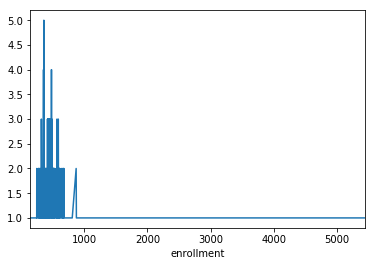

In [42]:
sat.groupby("enrollment")["enrollment"].count().plot(x="borough", y="enrollment")
#plt.savefig("start_time.png")
#!open start_time.png

In [205]:
plt.savefig("start_time.png")
!open start_time.png

<Figure size 432x288 with 0 Axes>

In [46]:
#sat['borough'].value_counts()
#sat.groupby("borough")["city"].count().plot(x="borough", y="")
#plt.savefig("borough.png")
#!open borough.png
#sat.plot(kind='bar',x='borough',y='final_sat')
borough = pd.read_csv(os.path.join("..", "Resources", "borough.csv"))
borough.head()

,borough,day_lenght,enrollment,white,black,hispanic,asian,math,reading,writing,final,participation
0,manhattan,0.291296,589.156863,0.101863,0.254608,0.514314,0.107353,455.887640,444.932584,439.314607,1146.846154,0.710111
1,staten island,0.282222,1977.818182,0.436364,0.153636,0.232727,0.163636,510.545455,498.363636,494.181818,1503.090909,0.701818
2,boronx,0.296038,502.576271,0.035254,0.283559,0.631441,0.038559,405.090909,403.181818,396.535354,1002.319328,0.562692
3,queens,0.288149,697.083333,0.074000,0.556250,0.280250,0.075833,418.372727,412.663636,405.136364,1114.581967,0.606348
4,brooklyn,0.287544,1010.650794,0.088571,0.364286,0.293810,0.226667,453.754717,437.358491,433.000000,1113.936508,0.672642


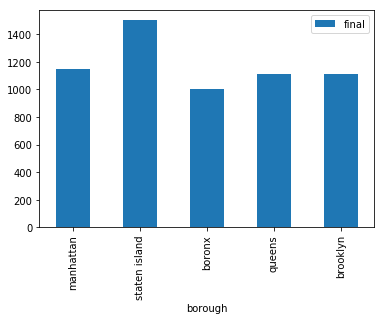

In [74]:
borough.plot(kind='bar',x='borough',y='final')


In [188]:
#start = datetime.datetime(2019,1,1)

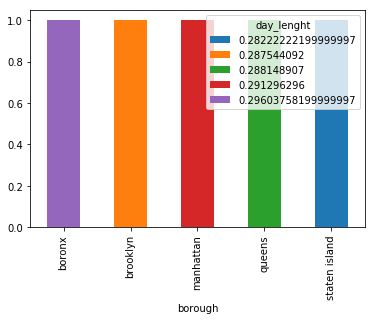

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

borough.groupby(['borough','day_lenght'])['day_lenght'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [192]:
sat['date_diff'].value_counts()

7.000000    81
6.750000    51
7.500000    32
6.500000    27
6.833333    24
7.750000    19
6.333333    15
6.250000    14
7.250000    14
8.000000    12
6.416667     6
7.166667     5
6.666667     4
7.333333     4
8.250000     4
8.500000     4
7.833333     3
6.783333     3
7.083333     3
6.583333     3
6.950000     3
6.766667     3
6.916667     2
8.333333     2
6.816667     2
6.316667     2
7.583333     2
7.116667     2
6.883333     2
6.866667     1
7.150000     1
6.633333     1
7.300000     1
6.266667     1
6.733333     1
6.400000     1
7.483333     1
6.650000     1
6.000000     1
5.916667     1
9.000000     1
7.350000     1
7.550000     1
6.166667     1
6.933333     1
8.416667     1
8.166667     1
7.216667     1
7.916667     1
6.683333     1
7.366667     1
7.666667     1
7.733333     1
7.700000     1
7.450000     1
Name: date_diff, dtype: int64

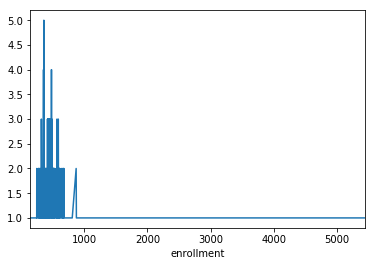

In [36]:
sat.groupby("enrollment")["borough"].count().plot(x="borough", y="borough")
#plt.savefig("day_lenght.png")
#!open day_lenght.png

In [193]:
sat['end_time'].value_counts()

3:00 PM    74
3:30 PM    56
3:15 PM    47
3:45 PM    29
2:45 PM    24
4:00 PM    24
3:20 PM    12
2:30 PM    12
4:15 PM     6
3:05 PM     6
3:40 PM     6
3:50 PM     6
3:10 PM     5
2:20 PM     5
2:50 PM     5
4:30 PM     4
3:35 PM     3
3:12 PM     3
2:15 PM     3
3:07 PM     3
2:40 PM     3
2:57 PM     3
5:00 PM     2
3:18 PM     2
2:05 PM     2
3:55 PM     2
2:56 PM     2
3:47 PM     1
2:46 PM     1
3:23 PM     1
3:22 PM     1
2:19 PM     1
3:11 PM     1
3:44 PM     1
3:14 PM     1
5:30 PM     1
4:07 PM     1
4:40 PM     1
3:27 PM     1
3:37 PM     1
4:10 PM     1
4:45 PM     1
3:39 PM     1
3:04 PM     1
3:19 PM     1
1:55 PM     1
2:48 PM     1
4:20 PM     1
3:26 PM     1
3:25 PM     1
2:34 PM     1
2:25 PM     1
Name: end_time, dtype: int64

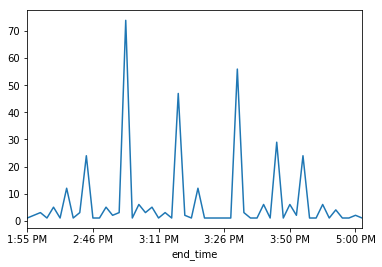

In [215]:
sat.groupby("end_time")["borough"].count().plot(x="end_time", y="")
plt.savefig("end_time.png")
!open end_time.png

In [123]:
sat['day_length'].value_counts()

7:00 AM     81
6:45 AM     51
7:30 AM     32
6:30 AM     27
6:50 AM     24
7:45 AM     19
6:20 AM     15
6:15 AM     14
7:15 AM     14
8:00 AM     12
6:25 AM      6
7:10 AM      5
7:20 AM      4
8:15 AM      4
8:30 AM      4
6:40 AM      4
6:57 AM      3
7:50 AM      3
6:46 AM      3
6:47 AM      3
6:35 AM      3
7:05 AM      3
6:55 AM      2
7:07 AM      2
8:20 AM      2
6:53 AM      2
6:49 AM      2
6:19 AM      2
7:35 AM      2
6:44 AM      1
6:41 AM      1
7:29 AM      1
6:00 AM      1
7:33 AM      1
9:00 AM      1
6:38 AM      1
7:22 AM      1
7:21 AM      1
7:18 AM      1
7:42 AM      1
7:40 AM      1
8:25 AM      1
6:16 AM      1
5:55 AM      1
8:10 AM      1
7:55 AM      1
6:39 AM      1
7:44 AM      1
6:52 AM      1
7:27 AM      1
6:56 AM      1
12:00 AM     1
6:10 AM      1
7:09 AM      1
7:13 AM      1
6:24 AM      1
Name: day_length, dtype: int64